In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# About the Dataset
This dataset contains daily weather observations from numerous Australian weather stations.

The target RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training your binary classification model. If you don't exclude it, you will leak the answers to your model and reduce its predictability.

## Columns
1. Date : The date of observation
2. Location : The common name of the location of the weather station
3. MinTemp : The minimum temperature in degrees celsius
4. MaxTemp : The maximum temperature in degrees celsius
5. Rainfall : The amount of rainfall recorded for the day in mm
6. Evaporation : The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine : The number of hours of bright sunshine in the day.
8. WindGustDir : The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am : Direction of the wind at 9am
11. WindDir3pm : Direction of the wind at 3pm
12. WindSpeed9am : Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm : Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14. Humidity9am : Humidity (percent) at 9am
15. Humidity3pm : Humidity (percent) at 3pm
16. Pressure9am : Atmospheric pressure (hpa) reduced to mean sea level at 9am
17. Pressure3pm : Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18. Cloud9am : Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
19. Cloud3pm : Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
20. Temp9am : Temperature (degrees C) at 9am
21. Temp3pm : Temperature (degrees C) at 3pm
22. RainToday : Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23. RISK_MM : The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
24. RainTomorrow : The target variable. Did it rain tomorrow?

In [2]:
# Loading the csv file
df=pd.read_csv("weatherAUS.csv")
# Printing first 5 rows
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
# Printing dimension of dataset (Rows, Columns)
df.shape

(142193, 24)

In [4]:
# Information about Null Values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

# Data Cleaning

In [5]:
# For Numerical Data
df.skew()

MinTemp          0.023900
MaxTemp          0.224917
Rainfall         9.888061
Evaporation      3.746834
Sunshine        -0.502911
WindGustSpeed    0.874305
WindSpeed9am     0.775494
WindSpeed3pm     0.631433
Humidity9am     -0.482821
Humidity3pm      0.034515
Pressure9am     -0.096211
Pressure3pm     -0.046198
Cloud9am        -0.224286
Cloud3pm        -0.224092
Temp9am          0.091387
Temp3pm          0.240054
RISK_MM          9.836902
dtype: float64

In general

Skew value between -0.5 to 0.5 -> Normalized data

Skew value between -1.0 to -0.5 -> Left Skewed

Skew value between 0.5 to 1.0 -> Right Skewed

There are few values in the columns which have no values, which in turn leads to inconsistency during prediction. Thus, we replace these values and it is done as follows:

1. Check for skewness of the particular feature.
2. If it is normalized we replace it with the Mean value.
3. If it is Right-skewed or Left-skewed we replace it with the Median value.

In [6]:
# Listing the columns according to the skewness
Normalized_Data=['MinTemp','MaxTemp','Evaporation','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am',
                 'Cloud3pm','Temp9am','Temp3pm']
Right_Skew=['Rainfall','WindGustSpeed','WindSpeed3pm','WindSpeed9am','RISK_MM']
Left_Skew=['Sunshine']

In [7]:
# For knowing how many null values present in which columns
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
# Replacing NaN value on the basis of skewness

# For Normalized data
for label in Normalized_Data:
    df[label].fillna(df[label].mean(),inplace=True)

# For Left and Right Skewness
for label in Right_Skew+Left_Skew:
    df[label].fillna(df[label].median(),inplace=True)

In [9]:
# For knowing how many null values present in which columns
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [10]:
# For categorical columns
cat_col=['WindGustDir','WindDir9am','WindDir3pm','RainToday']
for label in cat_col:
    df[label].fillna(df[label].mode()[0] ,inplace=True)

In [11]:
# For knowing how many null values present in which columns
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

We can see that there is no null value in any of the columns

# Data Visualisation

In [12]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,8.5,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,8.5,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,8.5,WSW,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,8.5,NE,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,8.5,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No


Text(0.5, 0, '(Value1,Value2) where Value1 is Location and Value2 is RainTomorrow')

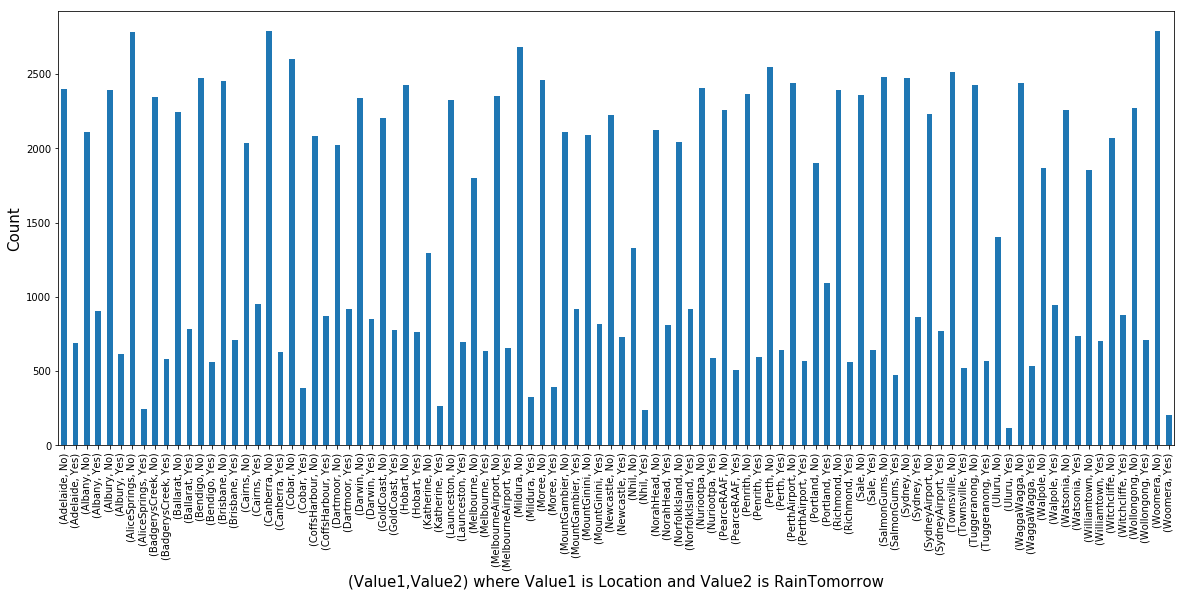

In [13]:
plt.figure(figsize=(20,8))
df.groupby(["Location","RainTomorrow"]).size().plot(kind="bar")
plt.ylabel("Count", fontsize=15)
plt.xlabel("(Value1,Value2) where Value1 is Location and Value2 is RainTomorrow", fontsize=15)

From the plot we can say that for any location chances of no RainTomorrow is always higher that chances of RainTomorrow

Text(0.5, 0, '(Value1,Value2) where Value1 is RainToday and Value2 is RainTomorrow')

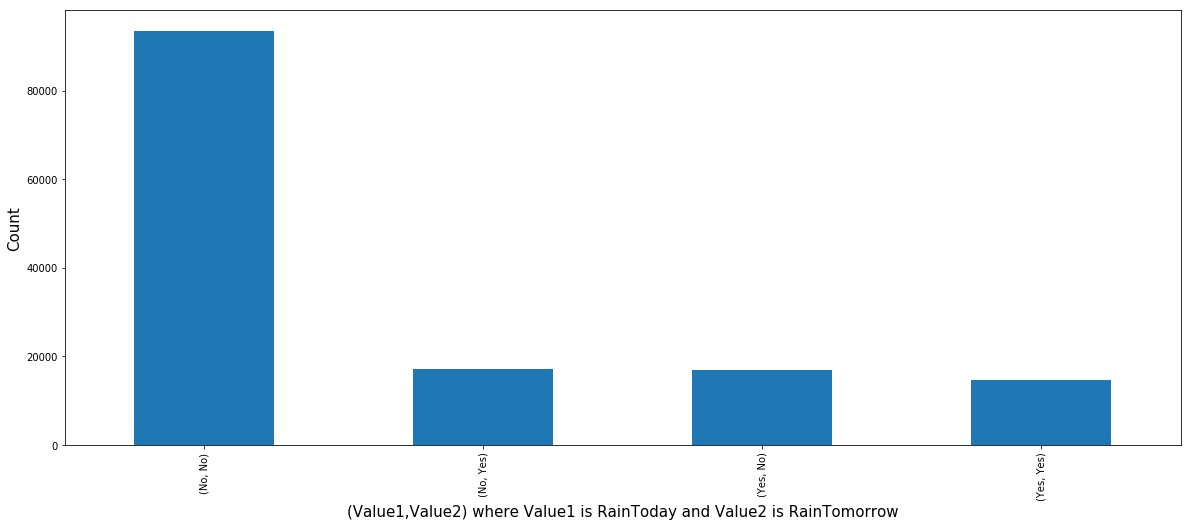

In [14]:
plt.figure(figsize=(20,8))
df.groupby(["RainToday","RainTomorrow"]).size().plot(kind="bar")
plt.ylabel("Count", fontsize=15)
plt.xlabel("(Value1,Value2) where Value1 is RainToday and Value2 is RainTomorrow", fontsize=15)

From the plot, we can say that if there is no RainToday then there is high chances that there is no RainTomorrow

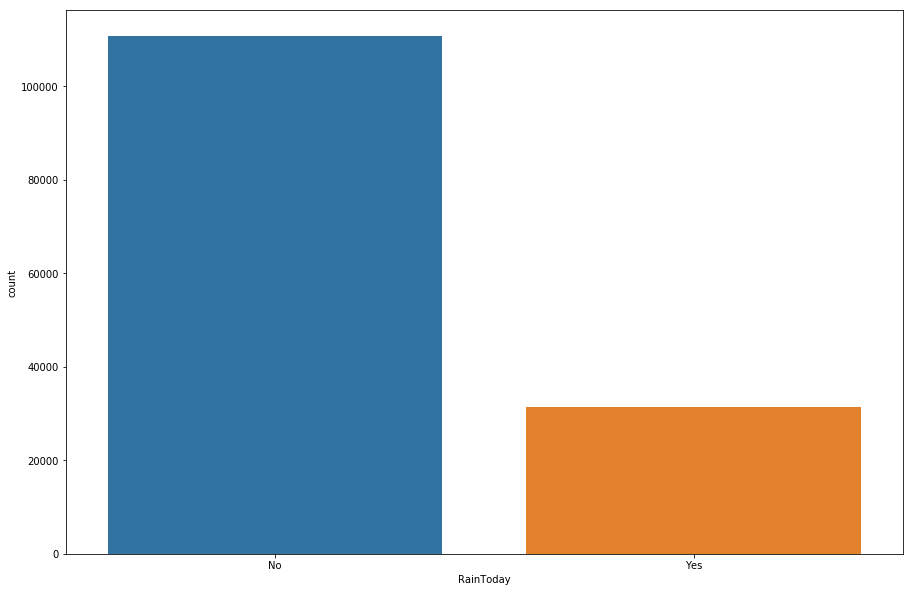

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(df["RainToday"])

We can say that chances of Rain Today is very less as most of the time the value is No.

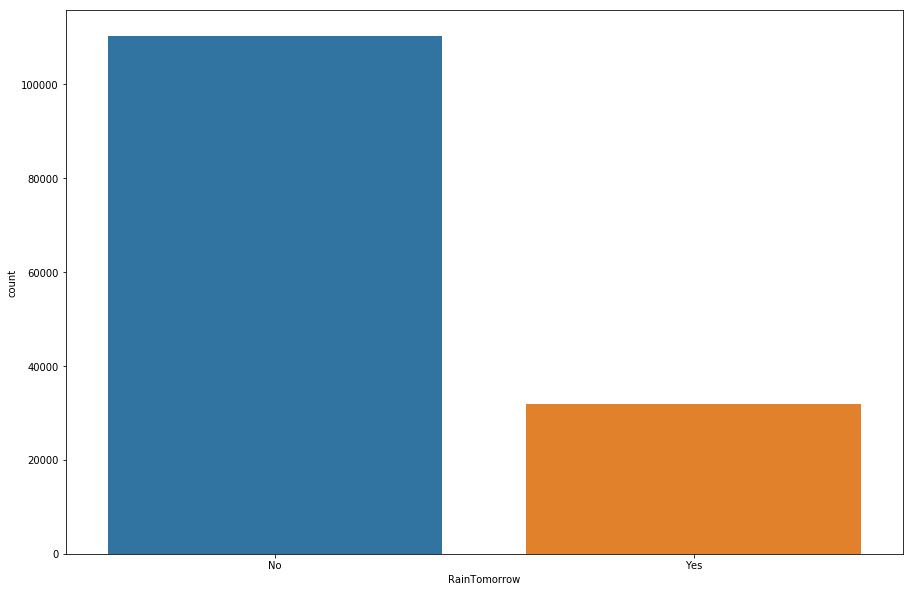

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(df["RainTomorrow"])

We can say that chances of Rain Tomorrow is very less as most of the time the value is No.

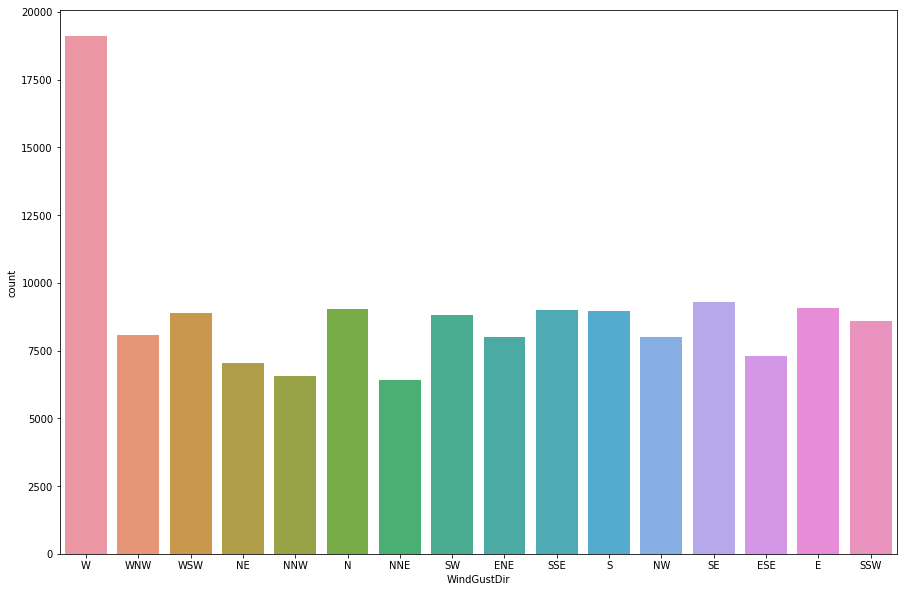

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(df["WindGustDir"])

We can say that most of the times direction of the strongest wind gust in the 24 hours to midnight is W and for rest of the directions count is almost same.

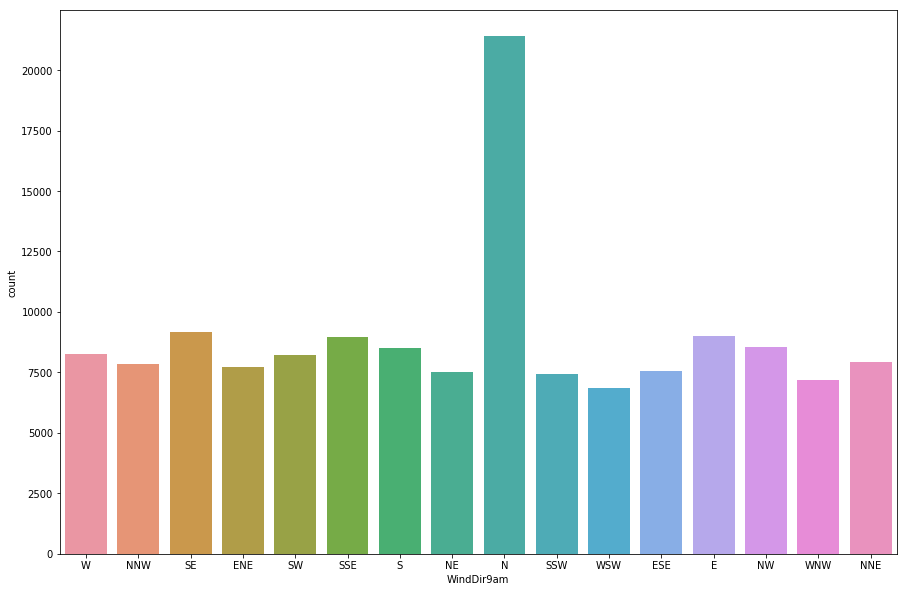

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(df["WindDir9am"])

We can say that most of the times the direction of the wind at 9am is in N and for rest of the directions count is almost same. 

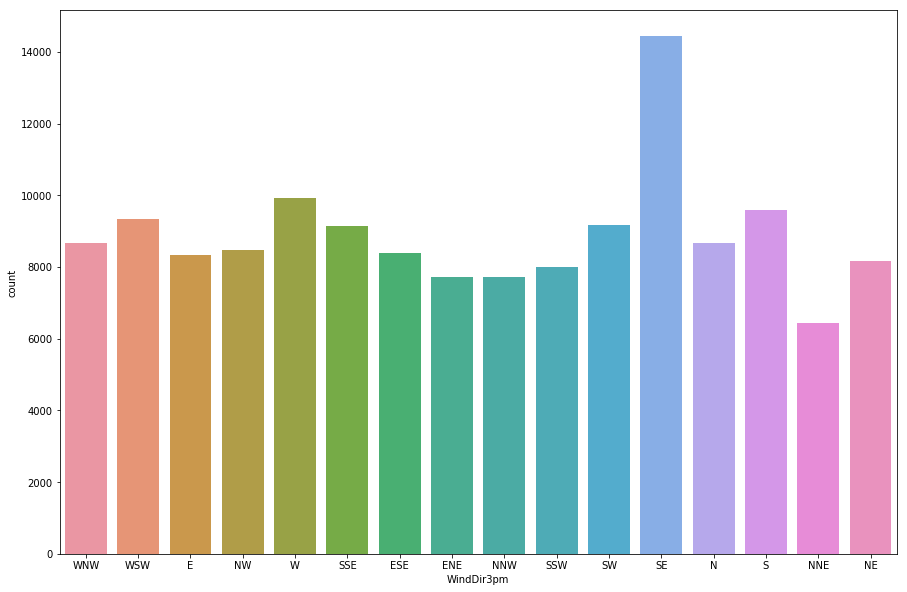

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(df["WindDir3pm"])

We can say that most of the times the direction of the wind at 3 pm is in SE and for rest of the directions count is almost same.

# Feature Engineering

In [20]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [21]:
# Dropping Date column because date is not important
df.drop("Date",axis=1, inplace=True)

# Droping column "RISK_MM" as it is menstioned in description of the dataset
df.drop('RISK_MM', axis=1, inplace=True)

Since Column RISK_MM contains information about the future For example, if RISKMM was greater than 0, then the RainTomorrow target variable is equal to Yes, and since it contains information directly about the target variable, including it would leak the future information to your model. Using it as a predictor to build a model and then testing on this dataset would give the false appearance of a high accuracy. So we have to drop it.

In [22]:
columns=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

for col in columns:
    # create the Labelencoder object
    le = LabelEncoder()

    # convert the categorical columns into numeric
    df[col] =le.fit_transform(df[col])
    
    col_mappings = {index: label for index, label in enumerate(le.classes_)}
    print("Mapping in column",col)
    print("****"*30)
    print(col_mappings)
    print()

Mapping in column Location
************************************************************************************************************************
{0: 'Adelaide', 1: 'Albany', 2: 'Albury', 3: 'AliceSprings', 4: 'BadgerysCreek', 5: 'Ballarat', 6: 'Bendigo', 7: 'Brisbane', 8: 'Cairns', 9: 'Canberra', 10: 'Cobar', 11: 'CoffsHarbour', 12: 'Dartmoor', 13: 'Darwin', 14: 'GoldCoast', 15: 'Hobart', 16: 'Katherine', 17: 'Launceston', 18: 'Melbourne', 19: 'MelbourneAirport', 20: 'Mildura', 21: 'Moree', 22: 'MountGambier', 23: 'MountGinini', 24: 'Newcastle', 25: 'Nhil', 26: 'NorahHead', 27: 'NorfolkIsland', 28: 'Nuriootpa', 29: 'PearceRAAF', 30: 'Penrith', 31: 'Perth', 32: 'PerthAirport', 33: 'Portland', 34: 'Richmond', 35: 'Sale', 36: 'SalmonGums', 37: 'Sydney', 38: 'SydneyAirport', 39: 'Townsville', 40: 'Tuggeranong', 41: 'Uluru', 42: 'WaggaWagga', 43: 'Walpole', 44: 'Watsonia', 45: 'Williamtown', 46: 'Witchcliffe', 47: 'Wollongong', 48: 'Woomera'}

Mapping in column WindGustDir
**************

In [23]:
# Checking the data type of each columns 
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

# Creating Model

In [24]:
# Splitting the Dataset into training and testing part

x=df.drop("RainTomorrow", axis=1)
y=df['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(113754, 21)
(113754,)
(28439, 21)
(28439,)


In [25]:
# Standardising the data
# Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [26]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creating object
model=LogisticRegression()

# Training the model
model.fit(x_train,y_train)

# Prediction
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
print("Accuracy of Logistic Regression is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of Logistic Regression is 84.34 %
